In [ ]:
# Lê Hoài Linh
import pandas as pd
import os
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đọc dữ liệu từ tệp CSV vào DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/BaoMat/1.benign.csv')
df2 = pd.read_csv('/content/drive/MyDrive/BaoMat/benign_traffic.csv')

In [ ]:
df1

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000e+00,1.000000,354.000000,0.000000,1.000000,...,3.409505e+01,0.000000e+00,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.000000e+00,0.000000e+00
2,1.857879,360.458980,3.578934e+01,1.912127,360.275733,3.592397e+01,1.969807,360.091968,35.991542,1.996939,...,1.000815e+02,0.000000e+00,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.000000e+00,0.000000e+00
3,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000e+00,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1.680223,172.140917,1.848745e+04,1.793580,182.560279,1.892818e+04,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49543,1.000000,102.000000,0.000000e+00,1.000000,102.000000,1.820000e-12,1.000009,101.999633,0.015405,2.270210,...,3.640000e-12,-1.570000e-30,0.0,4.218824,102.000000,0.000000,144.249783,1.820000e-12,5.970000e-23,0.000000e+00
49544,1.999976,102.000000,0.000000e+00,1.999986,102.000000,1.820000e-12,2.000004,101.999816,0.007702,3.270209,...,3.640000e-12,-1.580000e-44,0.0,4.218838,102.000000,0.000000,144.249783,3.640000e-12,-1.100000e-29,0.000000e+00
49545,2.999872,102.000000,3.640000e-12,2.999923,102.000000,1.820000e-12,2.999983,101.999878,0.005135,4.270206,...,0.000000e+00,-8.330000e-45,0.0,4.179949,102.000000,0.000002,144.249783,5.140000e-12,8.230000e-29,2.260000e-17
49546,3.999664,102.000000,3.640000e-12,3.999798,102.000000,0.000000e+00,3.999942,101.999908,0.003851,5.270200,...,3.640000e-12,4.980000e-69,0.0,4.219537,102.000000,0.000001,144.249783,1.820000e-12,5.960000e-29,0.000000e+00


In [ ]:
df2


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,70.000000,0.000000,1.000000,70.000000,0.000000,1.000000,70.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,70.000000,0.000000e+00,70.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,1.000008,89.999836,0.003289,1.000889,89.982231,0.355061,1.096162,88.245473,32.012169,1.791226,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,90.000000,0.000000e+00,90.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,...,9.451090e+03,0.000000e+00,0.000000e+00,11.163562,380.087760,9.212755e+01,380.087760,8.487485e+03,0.000000e+00,0.000000e+00
4,1.784845,328.723273,35.476876,1.864710,328.435318,35.810498,1.952701,328.145333,35.978878,1.995166,...,7.867203e+03,0.000000e+00,0.000000e+00,12.158154,376.297073,8.916126e+01,376.297073,7.949730e+03,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52145,1.073902,84.765847,1582.593179,1.247670,105.390124,4318.576952,4.031759,173.467252,10760.430890,36.630802,...,9.090000e-13,0.000000e+00,0.000000e+00,1.979497,74.000000,9.540000e-07,74.000000,9.090000e-13,0.000000e+00,0.000000e+00
52146,2.065535,79.553711,845.349320,2.241828,91.388106,2635.681835,5.025457,153.674573,10196.219480,37.625072,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000074,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
52147,2.427391,71.498267,589.718651,2.796009,80.162068,1919.363541,5.667428,137.145986,9672.242434,38.348017,...,9.927803e-01,0.000000e+00,0.000000e+00,4.173945,61.062809,9.980256e-01,61.062809,9.960551e-01,0.000000e+00,0.000000e+00
52148,1.029307,60.327384,20.447936,1.197532,63.325716,372.590267,3.342891,114.068364,8026.635547,36.105853,...,1.020000e-12,3.950000e-29,6.140000e-17,1.891003,60.000000,6.740000e-07,84.852814,1.020000e-12,-1.610000e-29,-2.510000e-17


In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,3.409505e+01,0.000000e+00,0.000000e+00,5.319895,344.262695,4.710446e+00,344.262695,2.218830e+01,0.000000e+00,0.000000e+00
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,1.000815e+02,0.000000e+00,0.000000e+00,6.318264,347.703087,9.034660e+00,347.703087,8.162508e+01,0.000000e+00,0.000000e+00
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,337.000000,0.000000e+00,337.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,1.073902,84.765847,1582.593179,1.247670,105.390124,4318.576952,4.031759,173.467252,10760.430890,36.630802,...,9.090000e-13,0.000000e+00,0.000000e+00,1.979497,74.000000,9.540000e-07,74.000000,9.090000e-13,0.000000e+00,0.000000e+00
101694,2.065535,79.553711,845.349320,2.241828,91.388106,2635.681835,5.025457,153.674573,10196.219480,37.625072,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000074,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00
101695,2.427391,71.498267,589.718651,2.796009,80.162068,1919.363541,5.667428,137.145986,9672.242434,38.348017,...,9.927803e-01,0.000000e+00,0.000000e+00,4.173945,61.062809,9.980256e-01,61.062809,9.960551e-01,0.000000e+00,0.000000e+00
101696,1.029307,60.327384,20.447936,1.197532,63.325716,372.590267,3.342891,114.068364,8026.635547,36.105853,...,1.020000e-12,3.950000e-29,6.140000e-17,1.891003,60.000000,6.740000e-07,84.852814,1.020000e-12,-1.610000e-29,-2.510000e-17


In [ ]:
columns_list = df.columns.tolist()
print(columns_list)

['MI_dir_L5_weight', 'MI_dir_L5_mean', 'MI_dir_L5_variance', 'MI_dir_L3_weight', 'MI_dir_L3_mean', 'MI_dir_L3_variance', 'MI_dir_L1_weight', 'MI_dir_L1_mean', 'MI_dir_L1_variance', 'MI_dir_L0.1_weight', 'MI_dir_L0.1_mean', 'MI_dir_L0.1_variance', 'MI_dir_L0.01_weight', 'MI_dir_L0.01_mean', 'MI_dir_L0.01_variance', 'H_L5_weight', 'H_L5_mean', 'H_L5_variance', 'H_L3_weight', 'H_L3_mean', 'H_L3_variance', 'H_L1_weight', 'H_L1_mean', 'H_L1_variance', 'H_L0.1_weight', 'H_L0.1_mean', 'H_L0.1_variance', 'H_L0.01_weight', 'H_L0.01_mean', 'H_L0.01_variance', 'HH_L5_weight', 'HH_L5_mean', 'HH_L5_std', 'HH_L5_magnitude', 'HH_L5_radius', 'HH_L5_covariance', 'HH_L5_pcc', 'HH_L3_weight', 'HH_L3_mean', 'HH_L3_std', 'HH_L3_magnitude', 'HH_L3_radius', 'HH_L3_covariance', 'HH_L3_pcc', 'HH_L1_weight', 'HH_L1_mean', 'HH_L1_std', 'HH_L1_magnitude', 'HH_L1_radius', 'HH_L1_covariance', 'HH_L1_pcc', 'HH_L0.1_weight', 'HH_L0.1_mean', 'HH_L0.1_std', 'HH_L0.1_magnitude', 'HH_L0.1_radius', 'HH_L0.1_covariance', '

In [ ]:
df.isna().sum()

MI_dir_L5_weight         0
MI_dir_L5_mean           0
MI_dir_L5_variance       0
MI_dir_L3_weight         0
MI_dir_L3_mean           0
                        ..
HpHp_L0.01_std           0
HpHp_L0.01_magnitude     0
HpHp_L0.01_radius        0
HpHp_L0.01_covariance    0
HpHp_L0.01_pcc           0
Length: 115, dtype: int64

In [ ]:
df.duplicated().sum()

11744

In [ ]:
#Hiển thị thông tin về DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101698 entries, 0 to 101697
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 89.2 MB


In [ ]:

# Xác định điều kiện phân loại (ví dụ: sử dụng cột 'HH_L5_covariance' làm tiêu chuẩn)
threshold = 0.5  # Ngưỡng để xác định dữ liệu là tấn công

# Tạo cột mục tiêu
df['target'] = (df['HH_L5_covariance'] > threshold).astype(int)



In [ ]:
target_count = df['target'].nunique()
target_count

2

In [ ]:
# Sử dụng phương thức unique() để lấy danh sách các giá trị duy nhất trong cột target
unique_values = df['target'].unique()

# In ra các giá trị duy nhất trong cột target
print("Các giá trị duy nhất trong cột target:", unique_values)

Các giá trị duy nhất trong cột target: [0 1]


In [ ]:
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,5.319895,344.262695,4.710446e+00,344.262695,2.218830e+01,0.000000e+00,0.000000e+00,0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.000000e+00,0.000000e+00,6.318264,347.703087,9.034660e+00,347.703087,8.162508e+01,0.000000e+00,0.000000e+00,0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,1.000000,337.000000,0.000000e+00,337.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000e+00,0.000000e+00,1.000000,60.000000,0.000000e+00,60.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,1.073902,84.765847,1582.593179,1.247670,105.390124,4318.576952,4.031759,173.467252,10760.430890,36.630802,...,0.000000e+00,0.000000e+00,1.979497,74.000000,9.540000e-07,74.000000,9.090000e-13,0.000000e+00,0.000000e+00,0
101694,2.065535,79.553711,845.349320,2.241828,91.388106,2635.681835,5.025457,153.674573,10196.219480,37.625072,...,0.000000e+00,0.000000e+00,1.000074,74.000000,0.000000e+00,74.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
101695,2.427391,71.498267,589.718651,2.796009,80.162068,1919.363541,5.667428,137.145986,9672.242434,38.348017,...,0.000000e+00,0.000000e+00,4.173945,61.062809,9.980256e-01,61.062809,9.960551e-01,0.000000e+00,0.000000e+00,0
101696,1.029307,60.327384,20.447936,1.197532,63.325716,372.590267,3.342891,114.068364,8026.635547,36.105853,...,3.950000e-29,6.140000e-17,1.891003,60.000000,6.740000e-07,84.852814,1.020000e-12,-1.610000e-29,-2.510000e-17,0


In [ ]:
# Với 80%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Giả sử df là DataFrame của bạn

# Chọn các trường dữ liệu 'MI_dir_L5_mean', 'MI_dir_L3_mean', 'MI_dir_L1_mean'
features = df.columns.tolist()
features.remove('target')
selected_features = features

# Chia dữ liệu thành features và labels
X = df[selected_features].values
y = df['target'].values  # Giả sử 'target_column' là cột mục tiêu bạn muốn dự đoán

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





In [ ]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
2543/2543 [==============================] - 14s 4ms/step - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.0037 - val_accuracy: 0.9986
Epoch 2/10
2543/2543 [==============================] - 15s 6ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0036 - val_accuracy: 0.9984
Epoch 3/10
2543/2543 [==============================] - 20s 8ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0027 - val_accuracy: 0.9991
Epoch 4/10
2543/2543 [==============================] - 20s 8ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 5/10
2543/2543 [==============================] - 20s 8ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9988
Epoch 6/10
2543/2543 [==============================] - 18s 7ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9990
Epoch 7/10
2543/2543 [==============================] - 12s 5ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0025 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dự đoán xác suất của các lớp
y_pred_prob = model.predict(X_test_scaled)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
threshold = 0.5  # Ngưỡng thường được chọn là 0.5
y_pred = (y_pred_prob > threshold).astype(int)

# Tính toán Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Tính toán các chỉ số khác
tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
fdr = fp / (fp + tp)
for_ = fn / (fn + tn)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("FPR:", fpr)
print("FNR:", fnr)
print("FDR:", fdr)
print("FOR:", for_)


636/636 [==============================] - 1s 2ms/step
Accuracy: 0.9995575221238938
Confusion Matrix:
[[20181     3]
 [    6   150]]
Sensitivity: 0.9615384615384616
Specificity: 0.9998513674197385
Precision: 0.9803921568627451
FPR: 0.00014863258026159333
FNR: 0.038461538461538464
FDR: 0.0196078431372549
FOR: 0.0002972209838014564


In [ ]:
#svm
from sklearn.svm import SVC
# Tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào yêu cầu của bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_scaled, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Dự đoán nhãn trên tập kiểm tra bằng SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Tính toán Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Tính toán confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Tính toán các chỉ số khác
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm.ravel()

sensitivity_svm = tp_svm / (tp_svm + fn_svm)
specificity_svm = tn_svm / (tn_svm + fp_svm)
precision_svm = tp_svm / (tp_svm + fp_svm)
fpr_svm = fp_svm / (fp_svm + tn_svm)
fnr_svm = fn_svm / (fn_svm + tp_svm)
fdr_svm = fp_svm / (fp_svm + tp_svm)
for_svm = fn_svm / (fn_svm + tn_svm)

print("Sensitivity (SVM):", sensitivity_svm)
print("Specificity (SVM):", specificity_svm)
print("Precision (SVM):", precision_svm)
print("FPR (SVM):", fpr_svm)
print("FNR (SVM):", fnr_svm)
print("FDR (SVM):", fdr_svm)
print("FOR (SVM):", for_svm)


Accuracy (SVM): 0.9987708947885939
Confusion Matrix (SVM):
[[20171    13]
 [   12   144]]
Sensitivity (SVM): 0.9230769230769231
Specificity (SVM): 0.9993559254855331
Precision (SVM): 0.9171974522292994
FPR (SVM): 0.0006440745144669045
FNR (SVM): 0.07692307692307693
FDR (SVM): 0.08280254777070063
FOR (SVM): 0.0005945597780310162


In [ ]:
# Xây dựng mô hình DNN
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Đối với bài toán nhị phân
                   metrics=['accuracy'])

# Đào tạo mô hình
model_dnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
2543/2543 [==============================] - 12s 4ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 0.0054 - val_accuracy: 0.9985
Epoch 2/10
2543/2543 [==============================] - 16s 6ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0036 - val_accuracy: 0.9985
Epoch 3/10
2543/2543 [==============================] - 20s 8ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0039 - val_accuracy: 0.9985
Epoch 4/10
2543/2543 [==============================] - 11s 4ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0018 - val_accuracy: 0.9994
Epoch 5/10
2543/2543 [==============================] - 14s 6ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.0019 - val_accuracy: 0.9991
Epoch 6/10
2543/2543 [==============================] - 20s 8ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9992
Epoch 7/10
2543/2543 [==============================] - 21s 8ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0026 - val_ac

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob_dnn = model_dnn.predict(X_test_scaled)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_dnn = (y_pred_prob_dnn > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)
print("Accuracy (DNN):", accuracy_dnn)

# Tính toán confusion matrix
conf_matrix_dnn = confusion_matrix(y_test, y_pred_dnn)
print("Confusion Matrix (DNN):")
print(conf_matrix_dnn)

# Tính toán các chỉ số khác
tn_dnn, fp_dnn, fn_dnn, tp_dnn = conf_matrix_dnn.ravel()

sensitivity_dnn = tp_dnn / (tp_dnn + fn_dnn)
specificity_dnn = tn_dnn / (tn_dnn + fp_dnn)
precision_dnn = tp_dnn / (tp_dnn + fp_dnn)
fpr_dnn = fp_dnn / (fp_dnn + tn_dnn)
fnr_dnn = fn_dnn / (fn_dnn + tp_dnn)
fdr_dnn = fp_dnn / (fp_dnn + tp_dnn)
for_dnn = fn_dnn / (fn_dnn + tn_dnn)

print("Sensitivity (DNN):", sensitivity_dnn)
print("Specificity (DNN):", specificity_dnn)
print("Precision (DNN):", precision_dnn)
print("FPR (DNN):", fpr_dnn)
print("FNR (DNN):", fnr_dnn)
print("FDR (DNN):", fdr_dnn)
print("FOR (DNN):", for_dnn)


636/636 [==============================] - 1s 2ms/step
Accuracy (DNN): 0.9990167158308751
Confusion Matrix (DNN):
[[20180     4]
 [   16   140]]
Sensitivity (DNN): 0.8974358974358975
Specificity (DNN): 0.9998018232263178
Precision (DNN): 0.9722222222222222
FPR (DNN): 0.00019817677368212446
FNR (DNN): 0.10256410256410256
FDR (DNN): 0.027777777777777776
FOR (DNN): 0.0007922360863537334


In [ ]:
# Xây dựng mô hình neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model_nn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/10
2543/2543 [==============================] - 12s 4ms/step - loss: 0.0114 - accuracy: 0.9972 - val_loss: 0.0108 - val_accuracy: 0.9966
Epoch 2/10
2543/2543 [==============================] - 11s 4ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0054 - val_accuracy: 0.9982
Epoch 3/10
2543/2543 [==============================] - 12s 5ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9988
Epoch 4/10
2543/2543 [==============================] - 17s 7ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 5/10
2543/2543 [==============================] - 18s 7ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.0049 - val_accuracy: 0.9989
Epoch 6/10
2543/2543 [==============================] - 19s 7ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 7/10
2543/2543 [==============================] - 17s 7ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0025 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán xác suất của các lớp
y_pred_prob_nn = model_nn.predict(X_test_scaled)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)

# Tính toán Accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy (NN):", accuracy_nn)

# Tính toán confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix (NN):")
print(conf_matrix_nn)

# Tính toán các chỉ số khác
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn.ravel()

sensitivity_nn = tp_nn / (tp_nn + fn_nn)
specificity_nn = tn_nn / (tn_nn + fp_nn)
precision_nn = tp_nn / (tp_nn + fp_nn)
fpr_nn = fp_nn / (fp_nn + tn_nn)
fnr_nn = fn_nn / (fn_nn + tp_nn)
fdr_nn = fp_nn / (fp_nn + tp_nn)
for_nn = fn_nn / (fn_nn + tn_nn)

print("Sensitivity (NN):", sensitivity_nn)
print("Specificity (NN):", specificity_nn)
print("Precision (NN):", precision_nn)
print("FPR (NN):", fpr_nn)
print("FNR (NN):", fnr_nn)
print("FDR (NN):", fdr_nn)
print("FOR (NN):", for_nn)


636/636 [==============================] - 1s 2ms/step
Accuracy (NN): 0.9993608652900688
Confusion Matrix (NN):
[[20174    10]
 [    3   153]]
Sensitivity (NN): 0.9807692307692307
Specificity (NN): 0.9995045580657946
Precision (NN): 0.9386503067484663
FPR (NN): 0.0004954419342053111
FNR (NN): 0.019230769230769232
FDR (NN): 0.06134969325153374
FOR (NN): 0.00014868414531397136


In [ ]:
# Áp dụng MFSLnO để chọn ra các đặc trưng quan trọng
# Ví dụ: sử dụng phương pháp phân tích phương sai
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.2)  # Chọn ra các đặc trưng có phương sai lớn hơn ngưỡng 0.2
X_train_selected = selector.fit_transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Xây dựng mạng nơ-ron sâu (DNN) với các đặc trưng đã được chọn
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình DNN
model_dnn.fit(X_train_selected, y_train, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test))


Epoch 1/10
2543/2543 [==============================] - 12s 4ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.0053 - val_accuracy: 0.9980
Epoch 2/10
2543/2543 [==============================] - 11s 4ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0046 - val_accuracy: 0.9984
Epoch 3/10
2543/2543 [==============================] - 17s 7ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 4/10
2543/2543 [==============================] - 15s 6ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9982
Epoch 5/10
2543/2543 [==============================] - 11s 4ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9993
Epoch 6/10
2543/2543 [==============================] - 11s 4ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 0.9990
Epoch 7/10
2543/2543 [==============================] - 11s 4ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0036 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Dự đoán nhãn cho tập kiểm tra bằng mô hình DNN với các đặc trưng đã được chọn
y_pred_dnn_MFSLnO = model_dnn.predict(X_test_selected)
y_pred_dnn_MFSLnO = (y_pred_dnn_MFSLnO > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_MFSLnO = accuracy_score(y_test, y_pred_dnn_MFSLnO)
print("Accuracy (DNN with selected features):", accuracy_dnn_MFSLnO)

# Tính toán confusion matrix
conf_matrix_dnn_MFSLnO = confusion_matrix(y_test, y_pred_dnn_MFSLnO)
print("Confusion Matrix (DNN with selected features):")
print(conf_matrix_dnn_MFSLnO)

# Tính toán các chỉ số khác
tn_dnn_MFSLnO, fp_dnn_MFSLnO, fn_dnn_MFSLnO, tp_dnn_MFSLnO = conf_matrix_dnn_MFSLnO.ravel()

sensitivity_dnn_MFSLnO = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fn_dnn_MFSLnO)
specificity_dnn_MFSLnO = tn_dnn_MFSLnO / (tn_dnn_MFSLnO + fp_dnn_MFSLnO)
precision_dnn_MFSLnO = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fp_dnn_MFSLnO)
fpr_dnn_MFSLnO = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tn_dnn_MFSLnO)
fnr_dnn_MFSLnO = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tp_dnn_MFSLnO)
fdr_dnn_MFSLnO = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tp_dnn_MFSLnO)
for_dnn_MFSLnO = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tn_dnn_MFSLnO)

print("Sensitivity (DNN with selected features):", sensitivity_dnn_MFSLnO)
print("Specificity (DNN with selected features):", specificity_dnn_MFSLnO)
print("Precision (DNN with selected features):", precision_dnn_MFSLnO)
print("FPR (DNN with selected features):", fpr_dnn_MFSLnO)
print("FNR (DNN with selected features):", fnr_dnn_MFSLnO)
print("FDR (DNN with selected features):", fdr_dnn_MFSLnO)
print("FOR (DNN with selected features):", for_dnn_MFSLnO)


636/636 [==============================] - 2s 2ms/step
Accuracy (DNN with selected features): 0.9992133726647001
Confusion Matrix (DNN with selected features):
[[20183     1]
 [   15   141]]
Sensitivity (DNN with selected features): 0.9038461538461539
Specificity (DNN with selected features): 0.9999504558065795
Precision (DNN with selected features): 0.9929577464788732
FPR (DNN with selected features): 4.9544193420531116e-05
FNR (DNN with selected features): 0.09615384615384616
FDR (DNN with selected features): 0.007042253521126761
FOR (DNN with selected features): 0.000742647786909595


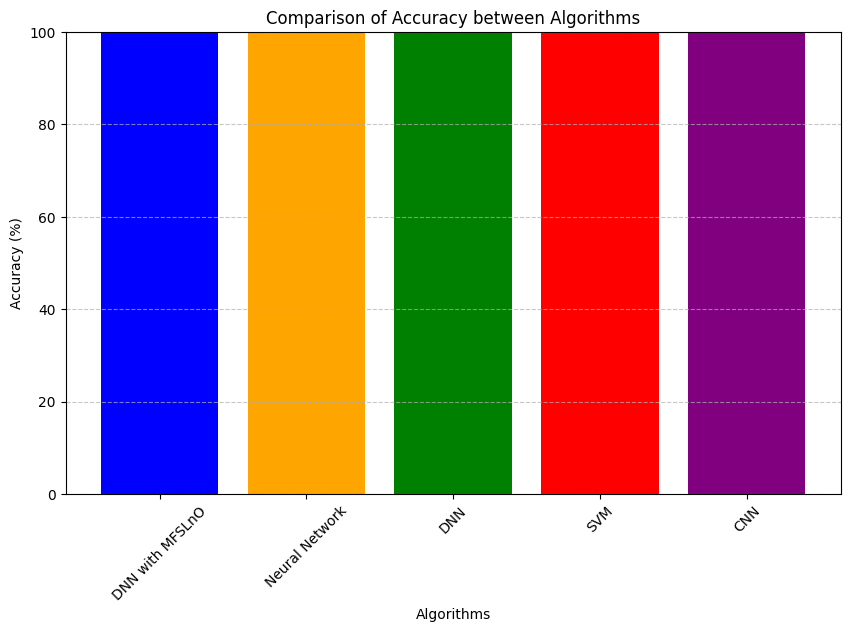

In [ ]:
import matplotlib.pyplot as plt

# Chuyển đổi độ chính xác sang phần trăm
# accuracy_dnn_MFSLnO_percent = accuracy_dnn_MFSLnO * 100
# accuracy_nn_percent = accuracy_nn * 100
# accuracy_dnn_percent = accuracy_dnn * 100
# accuracy_svm_percent = accuracy_svm * 100
# accuracy_percent = accuracy * 100

# Độ chính xác của các thuật toán
accuracies = [accuracy_dnn_MFSLnO, accuracy_nn, accuracy_dnn, accuracy_svm, accuracy]
algorithms = ['DNN_MFSLnO', 'Neural Network', 'DNN', 'SVM', 'CNN']

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy between Algorithms')
plt.ylim(0, 1)  # Đặt giới hạn cho trục y từ 0 đến 100 để hiển thị phần trăm
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Hiển


In [ ]:
#70%
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled_1 = scaler.fit_transform(X_train_1)
X_test_scaled_1 = scaler.transform(X_test_1)


In [ ]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model.fit(X_train_scaled_1, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_scaled_1, y_test_1))

Epoch 1/10
2225/2225 [==============================] - 11s 4ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0066 - val_accuracy: 0.9981
Epoch 2/10
2225/2225 [==============================] - 11s 5ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 3/10
2225/2225 [==============================] - 11s 5ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 0.9988
Epoch 4/10
2225/2225 [==============================] - 12s 5ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9991
Epoch 5/10
2225/2225 [==============================] - 10s 5ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 6/10
2225/2225 [==============================] - 10s 4ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 0.9992
Epoch 7/10
2225/2225 [==============================] - 10s 5ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0028 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dự đoán xác suất của các lớp
y_pred_prob = model.predict(X_test_scaled_1)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
threshold = 0.5  # Ngưỡng thường được chọn là 0.5
y_pred_1 = (y_pred_prob > threshold).astype(int)

# Tính toán Accuracy
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
print("Accuracy:", accuracy_1)

# Tính toán confusion matrix
conf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)
print("Confusion Matrix:")
print(conf_matrix_1)

# Tính toán các chỉ số khác
tn, fp, fn, tp = conf_matrix_1.ravel()

sensitivity_1 = tp / (tp + fn)
specificity_1 = tn / (tn + fp)
precision_1 = tp / (tp + fp)
fpr_1 = fp / (fp + tn)
fnr_1 = fn / (fn + tp)
fdr_1 = fp / (fp + tp)
for_1 = fn / (fn + tn)

print("Sensitivity:", sensitivity_1)
print("Specificity:", specificity_1)
print("Precision:", precision_1)
print("FPR:", fpr_1)
print("FNR:", fnr_1)
print("FDR:", fdr_1)
print("FOR:", for_1)


954/954 [==============================] - 2s 2ms/step
Accuracy: 0.9993772533595543
Confusion Matrix:
[[30284     8]
 [   11   207]]
Sensitivity: 0.9495412844036697
Specificity: 0.9997359038690083
Precision: 0.9627906976744186
FPR: 0.00026409613099168095
FNR: 0.05045871559633028
FDR: 0.037209302325581395
FOR: 0.0003630962204984321


In [ ]:

# Tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào yêu cầu của bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_scaled_1, y_train_1)

# Dự đoán nhãn trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled_1)

In [ ]:
# Dự đoán nhãn trên tập kiểm tra bằng SVM
y_pred_svm= svm_model.predict(X_test_scaled_1)

# Tính toán Accuracy
accuracy_svm_1 = accuracy_score(y_test_1, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm_1)

# Tính toán confusion matrix
conf_matrix_svm_1 = confusion_matrix(y_test_1, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm_1)

# Tính toán các chỉ số khác
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm_1.ravel()

sensitivity_svm_1 = tp_svm / (tp_svm + fn_svm)
specificity_svm_1 = tn_svm / (tn_svm + fp_svm)
precision_svm_1 = tp_svm / (tp_svm + fp_svm)
fpr_svm_1 = fp_svm / (fp_svm + tn_svm)
fnr_svm_1 = fn_svm / (fn_svm + tp_svm)
fdr_svm_1 = fp_svm / (fp_svm + tp_svm)
for_svm_1 = fn_svm / (fn_svm + tn_svm)

print("Sensitivity (SVM):", sensitivity_svm_1)
print("Specificity (SVM):", specificity_svm_1)
print("Precision (SVM):", precision_svm_1)
print("FPR (SVM):", fpr_svm_1)
print("FNR (SVM):", fnr_svm_1)
print("FDR (SVM):", fdr_svm_1)
print("FOR (SVM):", for_svm_1)


Accuracy (SVM): 0.9987872828580793
Confusion Matrix (SVM):
[[30273    19]
 [   18   200]]
Sensitivity (SVM): 0.9174311926605505
Specificity (SVM): 0.9993727716888947
Precision (SVM): 0.91324200913242
FPR (SVM): 0.0006272283111052423
FNR (SVM): 0.08256880733944955
FDR (SVM): 0.0867579908675799
FOR (SVM): 0.0005942359116569278


In [ ]:
# Xây dựng mô hình DNN
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Đối với bài toán nhị phân
                   metrics=['accuracy'])

# Đào tạo mô hình
model_dnn.fit(X_train_scaled_1, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_scaled_1, y_test_1))

Epoch 1/10
2225/2225 [==============================] - 11s 4ms/step - loss: 0.0107 - accuracy: 0.9973 - val_loss: 0.0044 - val_accuracy: 0.9986
Epoch 2/10
2225/2225 [==============================] - 11s 5ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0034 - val_accuracy: 0.9990
Epoch 3/10
2225/2225 [==============================] - 10s 5ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 4/10
2225/2225 [==============================] - 10s 5ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0084 - val_accuracy: 0.9981
Epoch 5/10
2225/2225 [==============================] - 9s 4ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 6/10
2225/2225 [==============================] - 12s 6ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 7/10
2225/2225 [==============================] - 12s 5ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0028 - val_acc

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob_dnn = model_dnn.predict(X_test_scaled_1)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_dnn = (y_pred_prob_dnn > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_1 = accuracy_score(y_test_1, y_pred_dnn)
print("Accuracy (DNN):", accuracy_dnn_1)

# Tính toán confusion matrix
conf_matrix_dnn = confusion_matrix(y_test_1, y_pred_dnn)
print("Confusion Matrix (DNN):")
print(conf_matrix_dnn)

# Tính toán các chỉ số khác
tn_dnn, fp_dnn, fn_dnn, tp_dnn = conf_matrix_dnn.ravel()

sensitivity_dnn_1 = tp_dnn / (tp_dnn + fn_dnn)
specificity_dnn_1 = tn_dnn / (tn_dnn + fp_dnn)
precision_dnn_1 = tp_dnn / (tp_dnn + fp_dnn)
fpr_dnn_1 = fp_dnn / (fp_dnn + tn_dnn)
fnr_dnn_1 = fn_dnn / (fn_dnn + tp_dnn)
fdr_dnn_1 = fp_dnn / (fp_dnn + tp_dnn)
for_dnn_1 = fn_dnn / (fn_dnn + tn_dnn)

print("Sensitivity (DNN):", sensitivity_dnn_1)
print("Specificity (DNN):", specificity_dnn_1)
print("Precision (DNN):", precision_dnn_1)
print("FPR (DNN):", fpr_dnn_1)
print("FNR (DNN):", fnr_dnn_1)
print("FDR (DNN):", fdr_dnn_1)
print("FOR (DNN):", for_dnn_1)


954/954 [==============================] - 2s 2ms/step
Accuracy (DNN): 0.9992133726647001
Confusion Matrix (DNN):
[[30280    12]
 [   12   206]]
Sensitivity (DNN): 0.944954128440367
Specificity (DNN): 0.9996038558035125
Precision (DNN): 0.944954128440367
FPR (DNN): 0.0003961441964875215
FNR (DNN): 0.05504587155963303
FDR (DNN): 0.05504587155963303
FOR (DNN): 0.0003961441964875215


In [ ]:
# Xây dựng mô hình neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model_nn.fit(X_train_scaled_1, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_scaled_1, y_test_1))

Epoch 1/10
2225/2225 [==============================] - 12s 5ms/step - loss: 0.0138 - accuracy: 0.9964 - val_loss: 0.0055 - val_accuracy: 0.9984
Epoch 2/10
2225/2225 [==============================] - 11s 5ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 3/10
2225/2225 [==============================] - 10s 5ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 4/10
2225/2225 [==============================] - 10s 5ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 5/10
2225/2225 [==============================] - 10s 4ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9991
Epoch 6/10
2225/2225 [==============================] - 10s 5ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 7/10
2225/2225 [==============================] - 10s 5ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0052 - val_ac

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob_nn = model_nn.predict(X_test_scaled_1)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)

# Tính toán Accuracy
accuracy_nn_1 = accuracy_score(y_test_1, y_pred_nn)
print("Accuracy (NN):", accuracy_nn_1)

# Tính toán confusion matrix
conf_matrix_nn = confusion_matrix(y_test_1, y_pred_nn)
print("Confusion Matrix (NN):")
print(conf_matrix_nn)

# Tính toán các chỉ số khác
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn.ravel()

sensitivity_nn_1 = tp_nn / (tp_nn + fn_nn)
specificity_nn_1 = tn_nn / (tn_nn + fp_nn)
precision_nn_1 = tp_nn / (tp_nn + fp_nn)
fpr_nn_1 = fp_nn / (fp_nn + tn_nn)
fnr_nn_1 = fn_nn / (fn_nn + tp_nn)
fdr_nn_1 = fp_nn / (fp_nn + tp_nn)
for_nn_1 = fn_nn / (fn_nn + tn_nn)

print("Sensitivity (NN):", sensitivity_nn_1)
print("Specificity (NN):", specificity_nn_1)
print("Precision (NN):", precision_nn_1)
print("FPR (NN):", fpr_nn_1)
print("FNR (NN):", fnr_nn_1)
print("FDR (NN):", fdr_nn_1)
print("FOR (NN):", for_nn_1)

954/954 [==============================] - 2s 2ms/step
Accuracy (NN): 0.9990494919698459
Confusion Matrix (NN):
[[30274    18]
 [   11   207]]
Sensitivity (NN): 0.9495412844036697
Specificity (NN): 0.9994057837052687
Precision (NN): 0.92
FPR (NN): 0.0005942162947312822
FNR (NN): 0.05045871559633028
FDR (NN): 0.08
FOR (NN): 0.0003632161135875846


In [ ]:
#DNN_MFSLnO

selector = VarianceThreshold(threshold=0.2)  # Chọn ra các đặc trưng có phương sai lớn hơn ngưỡng 0.2
X_train_selected = selector.fit_transform(X_train_scaled_1)
X_test_selected = selector.transform(X_test_scaled_1)

# Xây dựng mạng nơ-ron sâu (DNN) với các đặc trưng đã được chọn
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình DNN
model_dnn.fit(X_train_selected, y_train_1, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test_1))


Epoch 1/10
2225/2225 [==============================] - 12s 5ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0054 - val_accuracy: 0.9983
Epoch 2/10
2225/2225 [==============================] - 24s 11ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0048 - val_accuracy: 0.9985
Epoch 3/10
2225/2225 [==============================] - 17s 8ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.0045 - val_accuracy: 0.9988
Epoch 4/10
2225/2225 [==============================] - 20s 9ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9990
Epoch 5/10
2225/2225 [==============================] - 18s 8ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 6/10
2225/2225 [==============================] - 15s 7ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9988
Epoch 7/10
2225/2225 [==============================] - 13s 6ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0029 - val_a

In [ ]:
# Dự đoán nhãn cho tập kiểm tra bằng mô hình DNN với các đặc trưng đã được chọn
y_pred_dnn_MFSLnO = model_dnn.predict(X_test_selected)
y_pred_dnn_MFSLnO = (y_pred_dnn_MFSLnO > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_MFSLnO_1 = accuracy_score(y_test_1, y_pred_dnn_MFSLnO)
print("Accuracy (DNN with selected features):", accuracy_dnn_MFSLnO_1)

# Tính toán confusion matrix
conf_matrix_dnn_MFSLnO = confusion_matrix(y_test_1, y_pred_dnn_MFSLnO)
print("Confusion Matrix (DNN with selected features):")
print(conf_matrix_dnn_MFSLnO)

# Tính toán các chỉ số khác
tn_dnn_MFSLnO, fp_dnn_MFSLnO, fn_dnn_MFSLnO, tp_dnn_MFSLnO = conf_matrix_dnn_MFSLnO.ravel()

sensitivity_dnn_MFSLnO_1 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fn_dnn_MFSLnO)
specificity_dnn_MFSLnO_1 = tn_dnn_MFSLnO / (tn_dnn_MFSLnO + fp_dnn_MFSLnO)
precision_dnn_MFSLnO_1 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fp_dnn_MFSLnO)
fpr_dnn_MFSLnO_1 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tn_dnn_MFSLnO)
fnr_dnn_MFSLnO_1 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tp_dnn_MFSLnO)
fdr_dnn_MFSLnO_1 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tp_dnn_MFSLnO)
for_dnn_MFSLnO_1 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tn_dnn_MFSLnO)

print("Sensitivity (DNN with selected features):", sensitivity_dnn_MFSLnO_1)
print("Specificity (DNN with selected features):", specificity_dnn_MFSLnO_1)
print("Precision (DNN with selected features):", precision_dnn_MFSLnO_1)
print("FPR (DNN with selected features):", fpr_dnn_MFSLnO_1)
print("FNR (DNN with selected features):", fnr_dnn_MFSLnO_1)
print("FDR (DNN with selected features):", fdr_dnn_MFSLnO_1)
print("FOR (DNN with selected features):", for_dnn_MFSLnO_1)

954/954 [==============================] - 2s 2ms/step
Accuracy (DNN with selected features): 0.9993444772205834
Confusion Matrix (DNN with selected features):
[[30285     7]
 [   13   205]]
Sensitivity (DNN with selected features): 0.9403669724770642
Specificity (DNN with selected features): 0.9997689158853823
Precision (DNN with selected features): 0.9669811320754716
FPR (DNN with selected features): 0.00023108411461772086
FNR (DNN with selected features): 0.05963302752293578
FDR (DNN with selected features): 0.0330188679245283
FOR (DNN with selected features): 0.0004290712258234867


In [ ]:
#60%
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.4, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled_2 = scaler.fit_transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)

In [ ]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model.fit(X_train_scaled_2, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_scaled_2, y_test_2))

Epoch 1/10
1907/1907 [==============================] - 12s 6ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.0041 - val_accuracy: 0.9984
Epoch 2/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0037 - val_accuracy: 0.9988
Epoch 3/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 4/10
1907/1907 [==============================] - 12s 6ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 5/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9990
Epoch 6/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9990
Epoch 7/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0024 - val_accu

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob = model.predict(X_test_scaled_2)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
threshold = 0.5  # Ngưỡng thường được chọn là 0.5
y_pred_2 = (y_pred_prob > threshold).astype(int)

# Tính toán Accuracy
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print("Accuracy:", accuracy_2)

# Tính toán confusion matrix
conf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)
print("Confusion Matrix:")
print(conf_matrix_2)

# Tính toán các chỉ số khác
tn, fp, fn, tp = conf_matrix_2.ravel()

sensitivity_2 = tp / (tp + fn)
specificity_2 = tn / (tn + fp)
precision_2 = tp / (tp + fp)
fpr_2 = fp / (fp + tn)
fnr_2 = fn / (fn + tp)
fdr_2 = fp / (fp + tp)
for_2 = fn / (fn + tn)

print("Sensitivity:", sensitivity_2)
print("Specificity:", specificity_2)
print("Precision:", precision_2)
print("FPR:", fpr_2)
print("FNR:", fnr_2)
print("FDR:", fdr_2)
print("FOR:", for_2)

1272/1272 [==============================] - 3s 2ms/step
Accuracy: 0.9992133726647001
Confusion Matrix:
[[40364    10]
 [   22   284]]
Sensitivity: 0.9281045751633987
Specificity: 0.9997523158468321
Precision: 0.9659863945578231
FPR: 0.0002476841531678803
FNR: 0.0718954248366013
FDR: 0.034013605442176874
FOR: 0.0005447432278512356


In [ ]:
# Tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào yêu cầu của bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_scaled_2, y_train_2)

# Dự đoán nhãn trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled_2)

In [ ]:
# Dự đoán nhãn trên tập kiểm tra bằng SVM
y_pred_svm= svm_model.predict(X_test_scaled_2)

# Tính toán Accuracy
accuracy_svm_2 = accuracy_score(y_test_2, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm_2)

# Tính toán confusion matrix
conf_matrix_svm_2 = confusion_matrix(y_test_2, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm_2)

# Tính toán các chỉ số khác
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm_2.ravel()

sensitivity_svm_2 = tp_svm / (tp_svm + fn_svm)
specificity_svm_2 = tn_svm / (tn_svm + fp_svm)
precision_svm_2 = tp_svm / (tp_svm + fp_svm)
fpr_svm_2 = fp_svm / (fp_svm + tn_svm)
fnr_svm_2 = fn_svm / (fn_svm + tp_svm)
fdr_svm_2 = fp_svm / (fp_svm + tp_svm)
for_svm_2 = fn_svm / (fn_svm + tn_svm)

print("Sensitivity (SVM):", sensitivity_svm_2)
print("Specificity (SVM):", specificity_svm_2)
print("Precision (SVM):", precision_svm_2)
print("FPR (SVM):", fpr_svm_2)
print("FNR (SVM):", fnr_svm_2)
print("FDR (SVM):", fdr_svm_2)
print("FOR (SVM):", for_svm_2)


Accuracy (SVM): 0.9990658800393314
Confusion Matrix (SVM):
[[40358    16]
 [   22   284]]
Sensitivity (SVM): 0.9281045751633987
Specificity (SVM): 0.9996037053549314
Precision (SVM): 0.9466666666666667
FPR (SVM): 0.0003962946450686085
FNR (SVM): 0.0718954248366013
FDR (SVM): 0.05333333333333334
FOR (SVM): 0.0005448241703813769


In [ ]:
# Xây dựng mô hình DNN
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Đối với bài toán nhị phân
                   metrics=['accuracy'])

# Đào tạo mô hình
model_dnn.fit(X_train_scaled_2, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_scaled_2, y_test_2))

Epoch 1/10
1907/1907 [==============================] - 11s 5ms/step - loss: 0.0132 - accuracy: 0.9970 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 2/10
1907/1907 [==============================] - 12s 6ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0045 - val_accuracy: 0.9982
Epoch 3/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9989
Epoch 4/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9991
Epoch 5/10
1907/1907 [==============================] - 11s 6ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9991
Epoch 6/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 7/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0033 - val_accu

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob_dnn = model_dnn.predict(X_test_scaled_2)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_dnn = (y_pred_prob_dnn > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_2 = accuracy_score(y_test_2, y_pred_dnn)
print("Accuracy (DNN):", accuracy_dnn_2)

# Tính toán confusion matrix
conf_matrix_dnn = confusion_matrix(y_test_2, y_pred_dnn)
print("Confusion Matrix (DNN):")
print(conf_matrix_dnn)

# Tính toán các chỉ số khác
tn_dnn, fp_dnn, fn_dnn, tp_dnn = conf_matrix_dnn.ravel()

sensitivity_dnn_2 = tp_dnn / (tp_dnn + fn_dnn)
specificity_dnn_2 = tn_dnn / (tn_dnn + fp_dnn)
precision_dnn_2 = tp_dnn / (tp_dnn + fp_dnn)
fpr_dnn_2 = fp_dnn / (fp_dnn + tn_dnn)
fnr_dnn_2 = fn_dnn / (fn_dnn + tp_dnn)
fdr_dnn_2 = fp_dnn / (fp_dnn + tp_dnn)
for_dnn_2 = fn_dnn / (fn_dnn + tn_dnn)

print("Sensitivity (DNN):", sensitivity_dnn_2)
print("Specificity (DNN):", specificity_dnn_2)
print("Precision (DNN):", precision_dnn_2)
print("FPR (DNN):", fpr_dnn_2)
print("FNR (DNN):", fnr_dnn_2)
print("FDR (DNN):", fdr_dnn_2)
print("FOR (DNN):", for_dnn_2)


1272/1272 [==============================] - 2s 2ms/step
Accuracy (DNN): 0.9993117010816126
Confusion Matrix (DNN):
[[40352    22]
 [    6   300]]
Sensitivity (DNN): 0.9803921568627451
Specificity (DNN): 0.9994550948630306
Precision (DNN): 0.9316770186335404
FPR (DNN): 0.0005449051369693367
FNR (DNN): 0.0196078431372549
FDR (DNN): 0.06832298136645963
FOR (DNN): 0.0001486694087913177


In [ ]:
 #Xây dựng mô hình neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model_nn.fit(X_train_scaled_2, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_scaled_2, y_test_2))

Epoch 1/10
1907/1907 [==============================] - 13s 6ms/step - loss: 0.0128 - accuracy: 0.9968 - val_loss: 0.0044 - val_accuracy: 0.9983
Epoch 2/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 0.0088 - val_accuracy: 0.9979
Epoch 3/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0082 - val_accuracy: 0.9970
Epoch 4/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9988
Epoch 5/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0030 - val_accuracy: 0.9989
Epoch 6/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9991
Epoch 7/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0023 - val_accur

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob_nn = model_nn.predict(X_test_scaled_2)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)

# Tính toán Accuracy
accuracy_nn_2 = accuracy_score(y_test_2, y_pred_nn)
print("Accuracy (NN):", accuracy_nn_2)

# Tính toán confusion matrix
conf_matrix_nn = confusion_matrix(y_test_2, y_pred_nn)
print("Confusion Matrix (NN):")
print(conf_matrix_nn)

# Tính toán các chỉ số khác
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn.ravel()

sensitivity_nn_2 = tp_nn / (tp_nn + fn_nn)
specificity_nn_2 = tn_nn / (tn_nn + fp_nn)
precision_nn_2 = tp_nn / (tp_nn + fp_nn)
fpr_nn_2 = fp_nn / (fp_nn + tn_nn)
fnr_nn_2 = fn_nn / (fn_nn + tp_nn)
fdr_nn_2 = fp_nn / (fp_nn + tp_nn)
for_nn_2 = fn_nn / (fn_nn + tn_nn)

print("Sensitivity (NN):", sensitivity_nn_2)
print("Specificity (NN):", specificity_nn_2)
print("Precision (NN):", precision_nn_2)
print("FPR (NN):", fpr_nn_2)
print("FNR (NN):", fnr_nn_2)
print("FDR (NN):", fdr_nn_2)
print("FOR (NN):", for_nn_2)

1272/1272 [==============================] - 4s 3ms/step
Accuracy (NN): 0.9992625368731564
Confusion Matrix (NN):
[[40364    10]
 [   20   286]]
Sensitivity (NN): 0.934640522875817
Specificity (NN): 0.9997523158468321
Precision (NN): 0.9662162162162162
FPR (NN): 0.0002476841531678803
FNR (NN): 0.06535947712418301
FDR (NN): 0.033783783783783786
FOR (NN): 0.0004952456418383518


In [ ]:
#DNN_MFSLnO

selector = VarianceThreshold(threshold=0.2)  # Chọn ra các đặc trưng có phương sai lớn hơn ngưỡng 0.2
X_train_selected = selector.fit_transform(X_train_scaled_2)
X_test_selected = selector.transform(X_test_scaled_2)

# Xây dựng mạng nơ-ron sâu (DNN) với các đặc trưng đã được chọn
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình DNN
model_dnn.fit(X_train_selected, y_train_2, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test_2))

Epoch 1/10
1907/1907 [==============================] - 13s 6ms/step - loss: 0.0120 - accuracy: 0.9972 - val_loss: 0.0042 - val_accuracy: 0.9984
Epoch 2/10
1907/1907 [==============================] - 12s 6ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0052 - val_accuracy: 0.9982
Epoch 3/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0033 - val_accuracy: 0.9989
Epoch 4/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.0032 - val_accuracy: 0.9988
Epoch 5/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 6/10
1907/1907 [==============================] - 10s 5ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 0.9991
Epoch 7/10
1907/1907 [==============================] - 9s 5ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0029 - val_accu

In [ ]:
# Dự đoán nhãn cho tập kiểm tra bằng mô hình DNN với các đặc trưng đã được chọn
y_pred_dnn_MFSLnO = model_dnn.predict(X_test_selected)
y_pred_dnn_MFSLnO = (y_pred_dnn_MFSLnO > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_MFSLnO_2 = accuracy_score(y_test_2, y_pred_dnn_MFSLnO)
print("Accuracy (DNN with selected features):", accuracy_dnn_MFSLnO_2)

# Tính toán confusion matrix
conf_matrix_dnn_MFSLnO = confusion_matrix(y_test_2, y_pred_dnn_MFSLnO)
print("Confusion Matrix (DNN with selected features):")
print(conf_matrix_dnn_MFSLnO)

# Tính toán các chỉ số khác
tn_dnn_MFSLnO, fp_dnn_MFSLnO, fn_dnn_MFSLnO, tp_dnn_MFSLnO = conf_matrix_dnn_MFSLnO.ravel()

sensitivity_dnn_MFSLnO_2 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fn_dnn_MFSLnO)
specificity_dnn_MFSLnO_2 = tn_dnn_MFSLnO / (tn_dnn_MFSLnO + fp_dnn_MFSLnO)
precision_dnn_MFSLnO_2 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fp_dnn_MFSLnO)
fpr_dnn_MFSLnO_2 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tn_dnn_MFSLnO)
fnr_dnn_MFSLnO_2 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tp_dnn_MFSLnO)
fdr_dnn_MFSLnO_2 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tp_dnn_MFSLnO)
for_dnn_MFSLnO_2 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tn_dnn_MFSLnO)

print("Sensitivity (DNN with selected features):", sensitivity_dnn_MFSLnO_2)
print("Specificity (DNN with selected features):", specificity_dnn_MFSLnO_2)
print("Precision (DNN with selected features):", precision_dnn_MFSLnO_2)
print("FPR (DNN with selected features):", fpr_dnn_MFSLnO_2)
print("FNR (DNN with selected features):", fnr_dnn_MFSLnO_2)
print("FDR (DNN with selected features):", fdr_dnn_MFSLnO_2)
print("FOR (DNN with selected features):", for_dnn_MFSLnO_2)

1272/1272 [==============================] - 2s 2ms/step
Accuracy (DNN with selected features): 0.9992379547689282
Confusion Matrix (DNN with selected features):
[[40356    18]
 [   13   293]]
Sensitivity (DNN with selected features): 0.9575163398692811
Specificity (DNN with selected features): 0.9995541685242978
Precision (DNN with selected features): 0.9421221864951769
FPR (DNN with selected features): 0.00044583147570218456
FNR (DNN with selected features): 0.042483660130718956
FDR (DNN with selected features): 0.05787781350482315
FOR (DNN with selected features): 0.0003220292798929872


In [ ]:
#50%
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.5, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled_3 = scaler.fit_transform(X_train_3)
X_test_scaled_3 = scaler.transform(X_test_3)

In [ ]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model.fit(X_train_scaled_3, y_train_3, epochs=10, batch_size=32, validation_data=(X_test_scaled_3, y_test_3))

Epoch 1/10
1590/1590 [==============================] - 10s 6ms/step - loss: 0.0133 - accuracy: 0.9975 - val_loss: 0.0056 - val_accuracy: 0.9983
Epoch 2/10
1590/1590 [==============================] - 11s 7ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.0056 - val_accuracy: 0.9981
Epoch 3/10
1590/1590 [==============================] - 8s 5ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0043 - val_accuracy: 0.9986
Epoch 4/10
1590/1590 [==============================] - 12s 7ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 5/10
1590/1590 [==============================] - 12s 7ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9989
Epoch 6/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 7/10
1590/1590 [==============================] - 8s 5ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0030 - val_accur

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob = model.predict(X_test_scaled_3)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
threshold = 0.5  # Ngưỡng thường được chọn là 0.5
y_pred_3 = (y_pred_prob > threshold).astype(int)

# Tính toán Accuracy
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print("Accuracy:", accuracy_3)

# Tính toán confusion matrix
conf_matrix_3 = confusion_matrix(y_test_3, y_pred_3)
print("Confusion Matrix:")
print(conf_matrix_3)

# Tính toán các chỉ số khác
tn, fp, fn, tp = conf_matrix_3.ravel()

sensitivity_3 = tp / (tp + fn)
specificity_3 = tn / (tn + fp)
precision_3 = tp / (tp + fp)
fpr_3 = fp / (fp + tn)
fnr_3 = fn / (fn + tp)
fdr_3 = fp / (fp + tp)
for_3 = fn / (fn + tn)

print("Sensitivity:", sensitivity_3)
print("Specificity:", specificity_3)
print("Precision:", precision_3)
print("FPR:", fpr_3)
print("FNR:", fnr_3)
print("FDR:", fdr_3)
print("FOR:", for_3)

1590/1590 [==============================] - 3s 2ms/step
Accuracy: 0.9992723554052194
Confusion Matrix:
[[50469    19]
 [   18   343]]
Sensitivity: 0.9501385041551247
Specificity: 0.9996236729519886
Precision: 0.9475138121546961
FPR: 0.00037632704801140863
FNR: 0.04986149584487535
FDR: 0.052486187845303865
FOR: 0.0003565274229009448


In [ ]:
# Tạo mô hình SVM
svm_model = SVC(kernel='linear')  # Chọn kernel tùy thuộc vào yêu cầu của bài toán

# Huấn luyện mô hình SVM
svm_model.fit(X_train_scaled_3, y_train_3)

# Dự đoán nhãn trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test_scaled_3)

In [ ]:
# Dự đoán nhãn trên tập kiểm tra bằng SVM
y_pred_svm= svm_model.predict(X_test_scaled_3)

# Tính toán Accuracy
accuracy_svm_3 = accuracy_score(y_test_3, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm_3)

# Tính toán confusion matrix
conf_matrix_svm_3 = confusion_matrix(y_test_3, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm_3)

# Tính toán các chỉ số khác
tn_svm, fp_svm, fn_svm, tp_svm = conf_matrix_svm_3.ravel()

sensitivity_svm_3 = tp_svm / (tp_svm + fn_svm)
specificity_svm_3 = tn_svm / (tn_svm + fp_svm)
precision_svm_3 = tp_svm / (tp_svm + fp_svm)
fpr_svm_3 = fp_svm / (fp_svm + tn_svm)
fnr_svm_3 = fn_svm / (fn_svm + tp_svm)
fdr_svm_3 = fp_svm / (fp_svm + tp_svm)
for_svm_3 = fn_svm / (fn_svm + tn_svm)

print("Sensitivity (SVM):", sensitivity_svm_3)
print("Specificity (SVM):", specificity_svm_3)
print("Precision (SVM):", precision_svm_3)
print("FPR (SVM):", fpr_svm_3)
print("FNR (SVM):", fnr_svm_3)
print("FDR (SVM):", fdr_svm_3)
print("FOR (SVM):", for_svm_3)


Accuracy (SVM): 0.9990166964935397
Confusion Matrix (SVM):
[[50466    22]
 [   28   333]]
Sensitivity (SVM): 0.9224376731301939
Specificity (SVM): 0.9995642528917763
Precision (SVM): 0.9380281690140845
FPR (SVM): 0.00043574710822373634
FNR (SVM): 0.07756232686980609
FDR (SVM): 0.061971830985915494
FOR (SVM): 0.0005545213292668436


In [ ]:
# Xây dựng mô hình DNN
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
                   loss='binary_crossentropy',  # Đối với bài toán nhị phân
                   metrics=['accuracy'])

# Đào tạo mô hình
model_dnn.fit(X_train_scaled_3, y_train_3, epochs=10, batch_size=32, validation_data=(X_test_scaled_3, y_test_3))

Epoch 1/10
1590/1590 [==============================] - 10s 6ms/step - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.0044 - val_accuracy: 0.9985
Epoch 2/10
1590/1590 [==============================] - 8s 5ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0045 - val_accuracy: 0.9984
Epoch 3/10
1590/1590 [==============================] - 12s 7ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 0.0097 - val_accuracy: 0.9980
Epoch 4/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0024 - val_accuracy: 0.9990
Epoch 5/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0021 - accuracy: 0.9990 - val_loss: 0.0054 - val_accuracy: 0.9984
Epoch 6/10
1590/1590 [==============================] - 11s 7ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9991
Epoch 7/10
1590/1590 [==============================] - 12s 7ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0026 - val_accur

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob_dnn = model_dnn.predict(X_test_scaled_3)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_dnn = (y_pred_prob_dnn > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_3 = accuracy_score(y_test_3, y_pred_dnn)
print("Accuracy (DNN):", accuracy_dnn_3)

# Tính toán confusion matrix
conf_matrix_dnn = confusion_matrix(y_test_3, y_pred_dnn)
print("Confusion Matrix (DNN):")
print(conf_matrix_dnn)

# Tính toán các chỉ số khác
tn_dnn, fp_dnn, fn_dnn, tp_dnn = conf_matrix_dnn.ravel()

sensitivity_dnn_3 = tp_dnn / (tp_dnn + fn_dnn)
specificity_dnn_3 = tn_dnn / (tn_dnn + fp_dnn)
precision_dnn_3 = tp_dnn / (tp_dnn + fp_dnn)
fpr_dnn_3 = fp_dnn / (fp_dnn + tn_dnn)
fnr_dnn_3 = fn_dnn / (fn_dnn + tp_dnn)
fdr_dnn_3 = fp_dnn / (fp_dnn + tp_dnn)
for_dnn_3 = fn_dnn / (fn_dnn + tn_dnn)

print("Sensitivity (DNN):", sensitivity_dnn_3)
print("Specificity (DNN):", specificity_dnn_3)
print("Precision (DNN):", precision_dnn_3)
print("FPR (DNN):", fpr_dnn_3)
print("FNR (DNN):", fnr_dnn_3)
print("FDR (DNN):", fdr_dnn_3)
print("FOR (DNN):", for_dnn_3)


1590/1590 [==============================] - 3s 2ms/step
Accuracy (DNN): 0.9989970304234105
Confusion Matrix (DNN):
[[50446    42]
 [    9   352]]
Sensitivity (DNN): 0.9750692520775623
Specificity (DNN): 0.9991681191570274
Precision (DNN): 0.8934010152284264
FPR (DNN): 0.0008318808429725876
FNR (DNN): 0.024930747922437674
FDR (DNN): 0.1065989847715736
FOR (DNN): 0.00017837677138043801


In [ ]:
 #Xây dựng mô hình neural network
model_nn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(len(selected_features),)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Số lượng nơ-ron đầu ra phụ thuộc vào bài toán của bạn
])

# Biên dịch mô hình
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',  # Đối với bài toán nhị phân
              metrics=['accuracy'])

# Đào tạo mô hình
model_nn.fit(X_train_scaled_3, y_train_3, epochs=10, batch_size=32, validation_data=(X_test_scaled_3, y_test_3))

Epoch 1/10
1590/1590 [==============================] - 9s 5ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0087 - val_accuracy: 0.9973
Epoch 2/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0048 - val_accuracy: 0.9980
Epoch 3/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9989
Epoch 4/10
1590/1590 [==============================] - 10s 6ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9988
Epoch 5/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 6/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9991
Epoch 7/10
1590/1590 [==============================] - 11s 7ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0043 - val_accurac

In [ ]:
# Dự đoán xác suất của các lớp
y_pred_prob_nn = model_nn.predict(X_test_scaled_3)

# Chuyển đổi xác suất thành nhãn nhị phân bằng cách áp dụng ngưỡng
y_pred_nn = (y_pred_prob_nn > threshold).astype(int)

# Tính toán Accuracy
accuracy_nn_3 = accuracy_score(y_test_3, y_pred_nn)
print("Accuracy (NN):", accuracy_nn_3)

# Tính toán confusion matrix
conf_matrix_nn = confusion_matrix(y_test_3, y_pred_nn)
print("Confusion Matrix (NN):")
print(conf_matrix_nn)

# Tính toán các chỉ số khác
tn_nn, fp_nn, fn_nn, tp_nn = conf_matrix_nn.ravel()

sensitivity_nn_3 = tp_nn / (tp_nn + fn_nn)
specificity_nn_3 = tn_nn / (tn_nn + fp_nn)
precision_nn_3 = tp_nn / (tp_nn + fp_nn)
fpr_nn_3 = fp_nn / (fp_nn + tn_nn)
fnr_nn_3 = fn_nn / (fn_nn + tp_nn)
fdr_nn_3 = fp_nn / (fp_nn + tp_nn)
for_nn_3 = fn_nn / (fn_nn + tn_nn)

print("Sensitivity (NN):", sensitivity_nn_3)
print("Specificity (NN):", specificity_nn_3)
print("Precision (NN):", precision_nn_3)
print("FPR (NN):", fpr_nn_3)
print("FNR (NN):", fnr_nn_3)
print("FDR (NN):", fdr_nn_3)
print("FOR (NN):", for_nn_3)

1590/1590 [==============================] - 3s 2ms/step
Accuracy (NN): 0.9992920214753486
Confusion Matrix (NN):
[[50481     7]
 [   29   332]]
Sensitivity (NN): 0.9196675900277008
Specificity (NN): 0.9998613531928379
Precision (NN): 0.9793510324483776
FPR (NN): 0.00013864680716209793
FNR (NN): 0.08033240997229917
FDR (NN): 0.02064896755162242
FOR (NN): 0.0005741437339140764


In [ ]:
#DNN_MFSLnO

selector = VarianceThreshold(threshold=0.2)  # Chọn ra các đặc trưng có phương sai lớn hơn ngưỡng 0.2
X_train_selected = selector.fit_transform(X_train_scaled_3)
X_test_selected = selector.transform(X_test_scaled_3)

# Xây dựng mạng nơ-ron sâu (DNN) với các đặc trưng đã được chọn
model_dnn = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model_dnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình DNN
model_dnn.fit(X_train_selected, y_train_3, epochs=10, batch_size=32, validation_data=(X_test_selected, y_test_3))

Epoch 1/10
1590/1590 [==============================] - 10s 5ms/step - loss: 0.0132 - accuracy: 0.9975 - val_loss: 0.0040 - val_accuracy: 0.9985
Epoch 2/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 3/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9987
Epoch 4/10
1590/1590 [==============================] - 8s 5ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0049 - val_accuracy: 0.9987
Epoch 5/10
1590/1590 [==============================] - 9s 6ms/step - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9989
Epoch 6/10
1590/1590 [==============================] - 11s 7ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0022 - val_accuracy: 0.9992
Epoch 7/10
1590/1590 [==============================] - 10s 7ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0073 - val_accura

In [ ]:
# Dự đoán nhãn cho tập kiểm tra bằng mô hình DNN với các đặc trưng đã được chọn
y_pred_dnn_MFSLnO = model_dnn.predict(X_test_selected)
y_pred_dnn_MFSLnO = (y_pred_dnn_MFSLnO > threshold).astype(int)

# Tính toán Accuracy
accuracy_dnn_MFSLnO_3 = accuracy_score(y_test_3, y_pred_dnn_MFSLnO)
print("Accuracy (DNN with selected features):", accuracy_dnn_MFSLnO_3)

# Tính toán confusion matrix
conf_matrix_dnn_MFSLnO = confusion_matrix(y_test_3, y_pred_dnn_MFSLnO)
print("Confusion Matrix (DNN with selected features):")
print(conf_matrix_dnn_MFSLnO)

# Tính toán các chỉ số khác
tn_dnn_MFSLnO, fp_dnn_MFSLnO, fn_dnn_MFSLnO, tp_dnn_MFSLnO = conf_matrix_dnn_MFSLnO.ravel()

sensitivity_dnn_MFSLnO_3 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fn_dnn_MFSLnO)
specificity_dnn_MFSLnO_3 = tn_dnn_MFSLnO / (tn_dnn_MFSLnO + fp_dnn_MFSLnO)
precision_dnn_MFSLnO_3 = tp_dnn_MFSLnO / (tp_dnn_MFSLnO + fp_dnn_MFSLnO)
fpr_dnn_MFSLnO_3 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tn_dnn_MFSLnO)
fnr_dnn_MFSLnO_3 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tp_dnn_MFSLnO)
fdr_dnn_MFSLnO_3 = fp_dnn_MFSLnO / (fp_dnn_MFSLnO + tp_dnn_MFSLnO)
for_dnn_MFSLnO_3 = fn_dnn_MFSLnO / (fn_dnn_MFSLnO + tn_dnn_MFSLnO)

print("Sensitivity (DNN with selected features):", sensitivity_dnn_MFSLnO_3)
print("Specificity (DNN with selected features):", specificity_dnn_MFSLnO_3)
print("Precision (DNN with selected features):", precision_dnn_MFSLnO_3)
print("FPR (DNN with selected features):", fpr_dnn_MFSLnO_3)
print("FNR (DNN with selected features):", fnr_dnn_MFSLnO_3)
print("FDR (DNN with selected features):", fdr_dnn_MFSLnO_3)
print("FOR (DNN with selected features):", for_dnn_MFSLnO_3)

1590/1590 [==============================] - 3s 2ms/step
Accuracy (DNN with selected features): 0.9991936911247026
Confusion Matrix (DNN with selected features):
[[50479     9]
 [   32   329]]
Sensitivity (DNN with selected features): 0.9113573407202216
Specificity (DNN with selected features): 0.9998217398193631
Precision (DNN with selected features): 0.9733727810650887
FPR (DNN with selected features): 0.00017826018063698304
FNR (DNN with selected features): 0.0886426592797784
FDR (DNN with selected features): 0.026627218934911243
FOR (DNN with selected features): 0.0006335253707113302


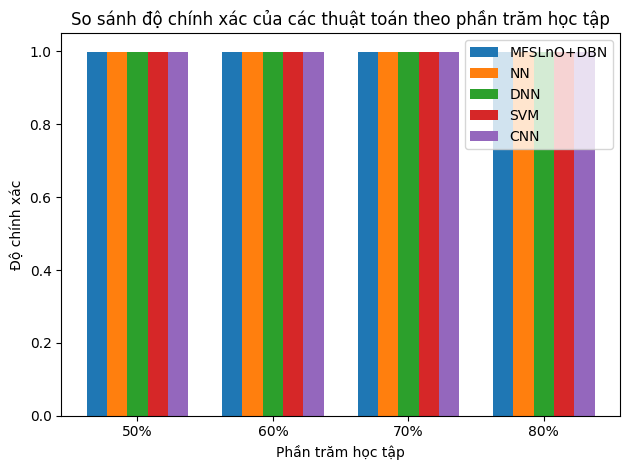

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
accuracies = [
    [accuracy_dnn_MFSLnO_3, accuracy_nn_3, accuracy_dnn_3, accuracy_svm_3, accuracy_3],
    [accuracy_dnn_MFSLnO_2, accuracy_nn_2, accuracy_dnn_2, accuracy_svm_2, accuracy_2],
    [accuracy_dnn_MFSLnO_1, accuracy_nn_1, accuracy_dnn_1, accuracy_svm_1, accuracy_1],
    [accuracy_dnn_MFSLnO, accuracy_nn, accuracy_dnn, accuracy_svm, accuracy],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [accuracy[i] for accuracy in accuracies], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('Độ chính xác')
plt.title('So sánh độ chính xác của các thuật toán theo phần trăm học tập')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


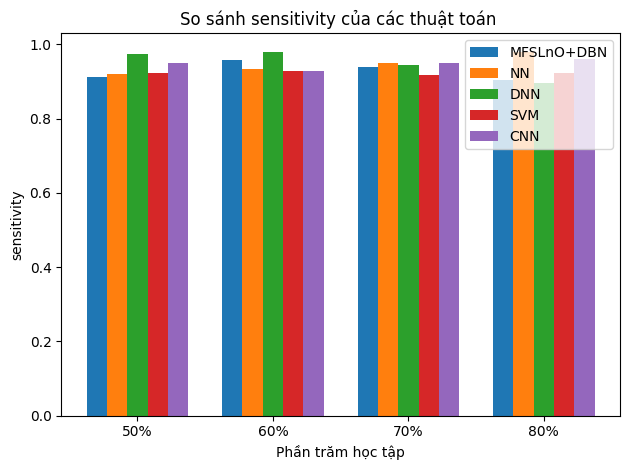

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
sensitivities = [
    [sensitivity_dnn_MFSLnO_3, sensitivity_nn_3, sensitivity_dnn_3, sensitivity_svm_3, sensitivity_3],
    [sensitivity_dnn_MFSLnO_2, sensitivity_nn_2, sensitivity_dnn_2, sensitivity_svm_2, sensitivity_2],
    [sensitivity_dnn_MFSLnO_1, sensitivity_nn_1, sensitivity_dnn_1, sensitivity_svm_1, sensitivity_1],
    [sensitivity_dnn_MFSLnO, sensitivity_nn, sensitivity_dnn, sensitivity_svm, sensitivity],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [sensitivity[i] for sensitivity in sensitivities], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('sensitivity')
plt.title('So sánh sensitivity của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


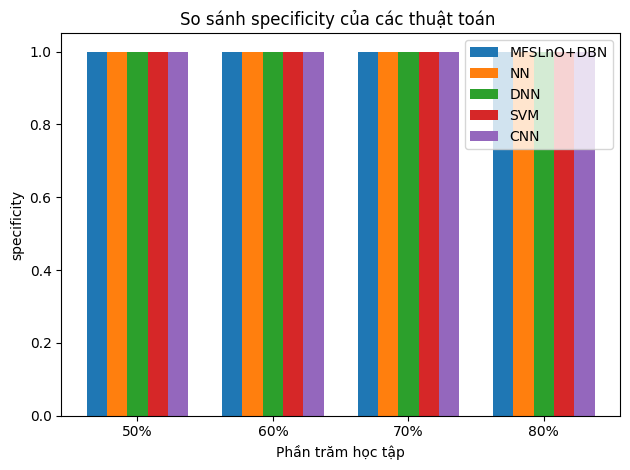

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
specificities = [
    [specificity_dnn_MFSLnO_3, specificity_nn_3, specificity_dnn_3, specificity_svm_3, specificity_3],
    [specificity_dnn_MFSLnO_2, specificity_nn_2, specificity_dnn_2, specificity_svm_2, specificity_2],
    [specificity_dnn_MFSLnO_1, specificity_nn_1, specificity_dnn_1, specificity_svm_1, specificity_1],
    [specificity_dnn_MFSLnO, specificity_nn, specificity_dnn, specificity_svm, specificity],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [specificity[i] for specificity in specificities], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('specificity')
plt.title('So sánh specificity của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


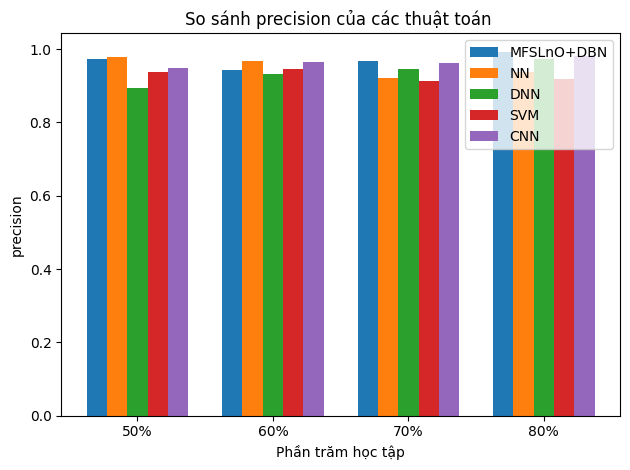

In [ ]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
precisiones = [
    [precision_dnn_MFSLnO_3, precision_nn_3, precision_dnn_3, precision_svm_3, precision_3],
    [precision_dnn_MFSLnO_2, precision_nn_2, precision_dnn_2, precision_svm_2, precision_2],
    [precision_dnn_MFSLnO_1, precision_nn_1, precision_dnn_1, precision_svm_1, precision_1],
    [precision_dnn_MFSLnO, precision_nn, precision_dnn, precision_svm, precision],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [precision[i] for precision in precisiones], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('precision')
plt.title('So sánh precision của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


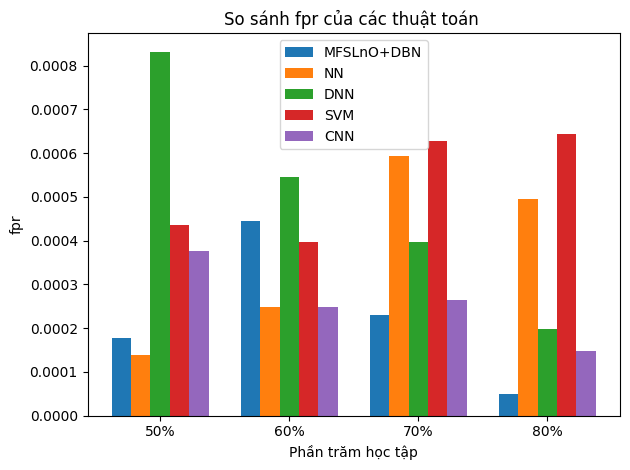

In [ ]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
fpres = [
    [fpr_dnn_MFSLnO_3, fpr_nn_3, fpr_dnn_3, fpr_svm_3, fpr_3],
    [fpr_dnn_MFSLnO_2, fpr_nn_2, fpr_dnn_2, fpr_svm_2, fpr_2],
    [fpr_dnn_MFSLnO_1, fpr_nn_1, fpr_dnn_1, fpr_svm_1, fpr_1],
    [fpr_dnn_MFSLnO, fpr_nn, fpr_dnn, fpr_svm, fpr],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [fpr[i] for fpr in fpres], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('fpr')
plt.title('So sánh fpr của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


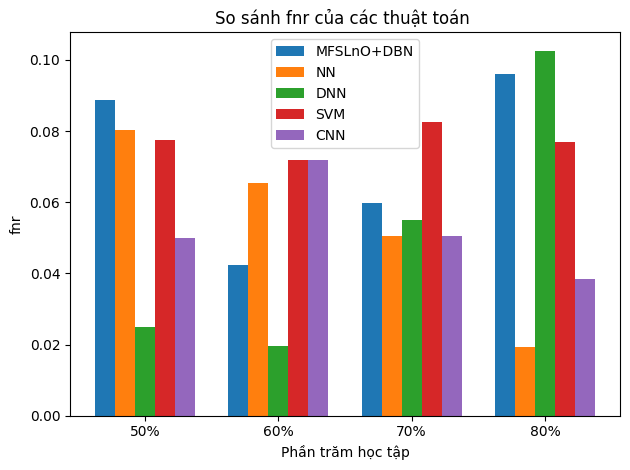

In [ ]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
fnres = [
    [fnr_dnn_MFSLnO_3, fnr_nn_3, fnr_dnn_3, fnr_svm_3, fnr_3],
    [fnr_dnn_MFSLnO_2, fnr_nn_2, fnr_dnn_2, fnr_svm_2, fnr_2],
    [fnr_dnn_MFSLnO_1, fnr_nn_1, fnr_dnn_1, fnr_svm_1, fnr_1],
    [fnr_dnn_MFSLnO, fnr_nn, fnr_dnn, fnr_svm, fnr],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [fnr[i] for fnr in fnres], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('fnr')
plt.title('So sánh fnr của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


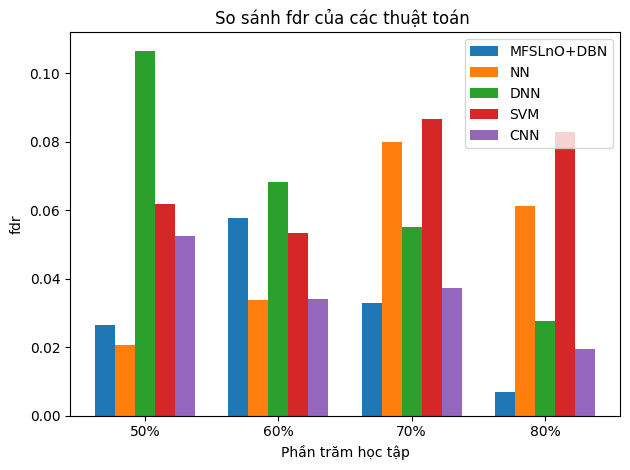

In [ ]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
fdres = [
    [fdr_dnn_MFSLnO_3, fdr_nn_3, fdr_dnn_3, fdr_svm_3, fdr_3],
    [fdr_dnn_MFSLnO_2, fdr_nn_2, fdr_dnn_2, fdr_svm_2, fdr_2],
    [fdr_dnn_MFSLnO_1, fdr_nn_1, fdr_dnn_1, fdr_svm_1, fdr_1],
    [fdr_dnn_MFSLnO, fdr_nn, fdr_dnn, fdr_svm, fdr],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [fdr[i] for fdr in fdres], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('fdr')
plt.title('So sánh fdr của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()


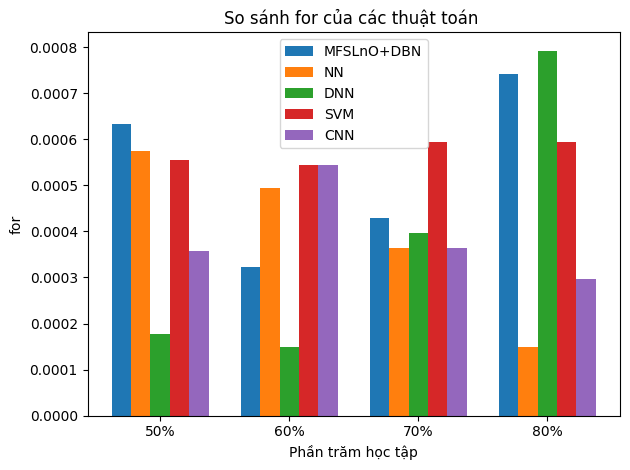

In [ ]:


# Dữ liệu
percentages = ['50%', '60%', '70%', '80%']
algorithms = ['MFSLnO+DBN', 'NN', 'DNN', 'SVM', 'CNN']
fores = [
    [for_dnn_MFSLnO_3, for_nn_3, for_dnn_3, for_svm_3, for_3],
    [for_dnn_MFSLnO_2, for_nn_2, for_dnn_2, for_svm_2, for_2],
    [for_dnn_MFSLnO_1, for_nn_1, for_dnn_1, for_svm_1, for_1],
    [for_dnn_MFSLnO, for_nn, for_dnn, for_svm, for_],
]

# Vẽ biểu đồ cột
fig, ax = plt.subplots()
bar_width = 0.15
index = np.arange(len(percentages))  # Create an array of indices for x-axis positions

# Create bars for each algorithm
for i in range(len(algorithms)):
    plt.bar(index + i * bar_width, [for1[i] for for1 in fores], bar_width, label=algorithms[i])

plt.xlabel('Phần trăm học tập')
plt.ylabel('for')
plt.title('So sánh for của các thuật toán ')
plt.xticks(index + bar_width * (len(algorithms) - 1) / 2, percentages)
plt.legend()
plt.tight_layout()
plt.show()
